# Simple Linear Regresson for Mileage vs Price

# Task, part 1

In [1]:
# importing the required package for read and clean the data

import pandas as pd  # to handle the dataframe

import numpy as np  # to handle the array

In [2]:
df = pd.read_csv("car_data.csv")  # reading the dataset

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.shape  # checking how many rows and columns are present in the data

(804, 12)

# Pre-processing The Data 

In [5]:
df.isnull().sum()  # checking the missing values

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df = df.drop_duplicates()  # dropping the duplicates

df.shape

(804, 12)

In [7]:
df.dtypes  # checking for data types

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [8]:
df.describe()  # checking for outliers

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [9]:
# By using IQR method we can find outliers

iqr = df['Leather'].quantile(0.75) - df['Leather'].quantile(0.25)  # (q3 - q1)

upper_threshold = df['Leather'].quantile(0.75) + (1.5 * iqr)  # (q3 + (1.5 * iqr))

lower_threshold = df['Leather'].quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold

(2.5, -1.5)

In [10]:
# by using clip function we can treat the outlier

df.Mileage = df.Mileage.clip(-1260 , 41097)

In [11]:
df.Doors = df.Doors.clip(4 , 4)

# Checked and treated the outliers

In [12]:
df.shape  # after deleting the duplicates we checking the rows and columns 

(804, 12)

# EDA

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


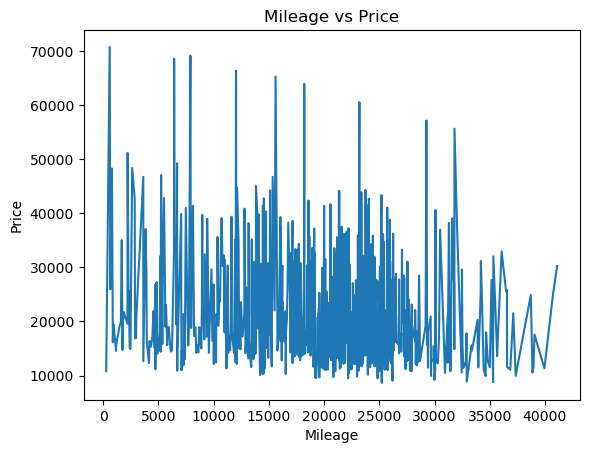

In [13]:
import matplotlib.pyplot as plt  # importing required package for eda

df['Trans'] = np.exp(df['Mileage'])

df.groupby('Mileage')['Price'].mean().plot()

#df.plot(x = 'Mileage', y = 'Price', style = 'o')

plt.title('Mileage vs Price')

plt.xlabel('Mileage')

plt.ylabel('Price')

plt.show()

# 1). Tried all the transformatons, 2). There is no linear releation btw mileage and price

In [14]:
df[['Trans' , 'Price']].corr()

,Trans,Price
Trans,NaN,-0.0
Price,-0.0,1.0


# Spliting the data

In [15]:
X = df.loc[ : ,['Mileage']].values

y = df.loc[ : ,'Price'].values

from sklearn.model_selection import train_test_split  # importing required package

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

# scaling

In [16]:
from sklearn.preprocessing import StandardScaler  # importing required package for scaling

scaler = StandardScaler()  # initialize to a variable

scaler.fit(X_train)  # by fitting we are finding the mean and SD of a training data

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)  # only fit the X_train not the X_test

# Modeling 

In [17]:
from sklearn.linear_model import LinearRegression  # importing the required package for linear model

regressor = LinearRegression()  # initialize the model to a variable

regressor.fit(X_train_scaled , y_train)  # learning happens and GD is done and getting the final values of M and C

LinearRegression()

In [18]:
regressor.intercept_  # C

21273.422670078122

In [19]:
regressor.coef_  # slope - m

array([-1470.7429138])

In [20]:
coeff_df = pd.DataFrame(regressor.coef_, ['Mileage'], columns = ['Coefficient'])

coeff_df

,Coefficient
Mileage,-1470.742914


In [21]:
y_pred = regressor.predict(X_test_scaled)

y_pred

array([20260.43545616, 20209.54856925, 21468.29225798, 21592.68242598,
       20904.29592805, 22433.1995129 , 22067.98008497, 21594.62602235,
       20438.18617919, 21357.15388344, 19961.47499556, 22673.32201051,
       21257.14701541, 20238.70251488, 21182.0535191 , 21112.26074018,
       20329.16809161, 20613.46323411, 21948.36056262, 19882.14092535,
       20559.74929792, 18993.91738194, 21749.7603512 , 19296.41165413,
       20926.91232223, 21370.93574864, 21404.1535776 , 22932.17370956,
       20254.9580482 , 22668.90474603, 21968.67997926, 20816.65740059,
       21680.14426286, 21095.47513512, 22000.48428358, 21190.18128576,
       22616.4276439 , 21129.22303582, 20292.59314164, 21025.15228446,
       21143.00490102, 19981.44103105, 20958.18655481, 22526.66882949,
       23729.22491391, 19652.44317193, 22295.0274797 , 21257.50039657,
       22053.13807629, 20877.26226938, 22441.15058898, 21044.76493879,
       22635.33353591, 21594.09595062, 21522.71295648, 21686.85850488,
      

In [22]:
df_ = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})

df_

,Actual,Predicted
0,11013.871368,20260.435456
1,13825.154711,20209.548569
2,14508.750085,21468.292258
3,15568.974237,21592.682426
4,22230.027503,20904.295928
...,...,...
237,21895.758784,21892.703030
238,16295.211438,19819.945841
239,23527.728502,22168.340334
240,10386.040218,20882.562987


# Evaluating the model

In [23]:
from sklearn.metrics import r2_score 

print('R2_Score :' , r2_score(y_test , y_pred))

R2_Score : 0.017248806411415796


# 1). Hence there is less r2 score, 2). This Mileage feature is not fit for the simple linear regression, 3). We are considering to drop the feature

# Task, Part 2

# Multiple_Linear_Regression

# EDA

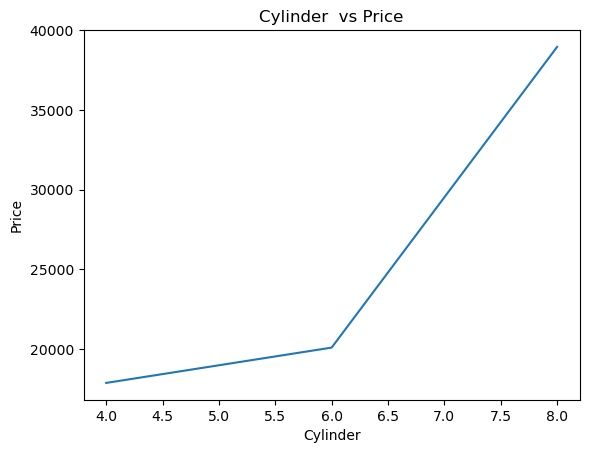

In [24]:
#df.plot(x = 'Cylinder', y = 'Price', style = 'o')

df.groupby('Cylinder')['Price'].mean().plot()

plt.title('Cylinder  vs Price')

plt.xlabel('Cylinder')

plt.ylabel('Price')

plt.show()

# 1). There is linear releaton btw cylinder and price, 2). There is strong cor-releation, 3). No transformation is required

In [25]:
df[['Cylinder' , 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


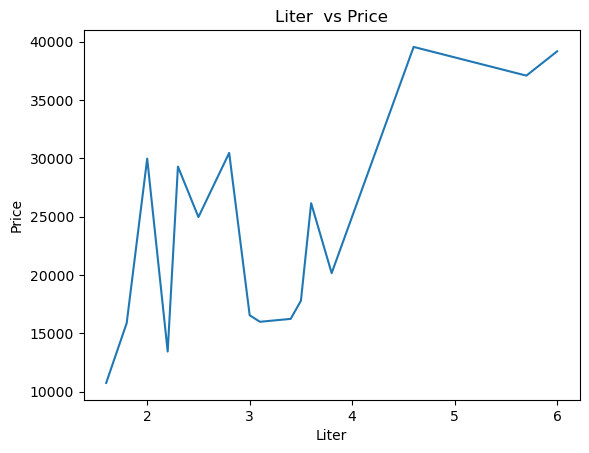

In [26]:
#df.plot(x = 'Liter', y = 'Price', style = 'o')

df.groupby('Liter')['Price'].mean().plot()

plt.title('Liter  vs Price')

plt.xlabel('Liter')

plt.ylabel('Price')

plt.show()

# 1). There is linear releaton btw Liter and price, 2). There is strong cor-releation, 3). No transformation is required

In [27]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


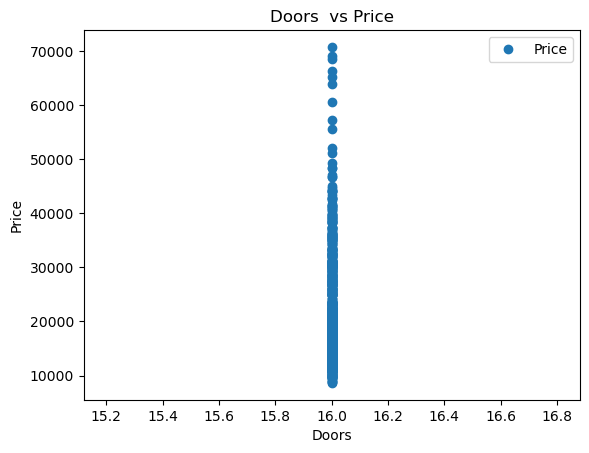

In [28]:
df['Trans'] = np.square(df['Doors'])

df.plot(x = 'Trans', y = 'Price', style = 'o')

plt.title('Doors  vs Price')

plt.xlabel('Doors')

plt.ylabel('Price')

plt.show()

# 1). There is no linear releaton btw Doors and price, 2). There is poor cor-releation, 3). All transformations are tried

In [29]:
df[['Trans' , 'Price']].corr()

,Trans,Price
Trans,NaN,NaN
Price,NaN,1.0


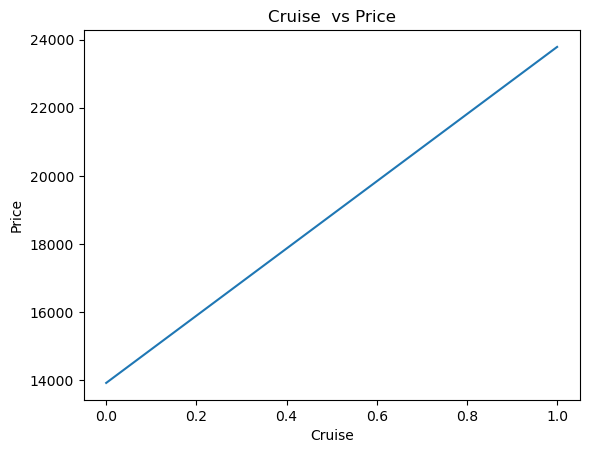

In [30]:
#df.plot(x = 'Cruise', y = 'Price', style = 'o')

df.groupby('Cruise')['Price'].mean().plot()

plt.title('Cruise  vs Price')

plt.xlabel('Cruise')

plt.ylabel('Price')

plt.show()

# 1). There is linear releaton btw Cruise and price, 2). There is strong cor-releation, 3). No transformation is required

In [31]:
df[['Cruise' , 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


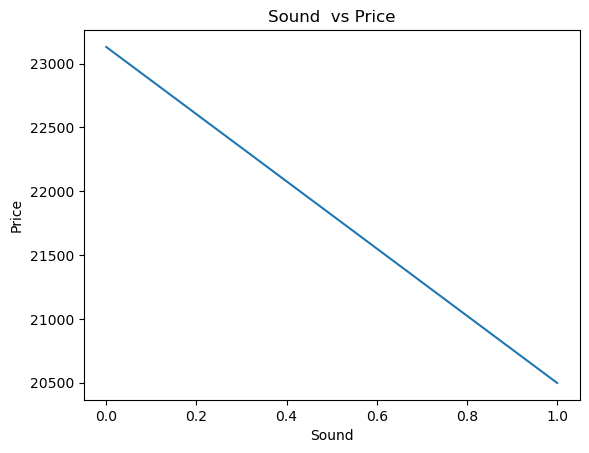

In [32]:
df['Trans_'] = np.power(df['Sound'],0.5)

df.groupby('Trans_')['Price'].mean().plot()

plt.title('Sound  vs Price')

plt.xlabel('Sound')

plt.ylabel('Price')

plt.show()

# 1). There is no linear releaton btw Sound and price, 2). There is poor cor-releation, 3). All transformations are tried

In [33]:
df[['Trans_' , 'Price']].corr()

,Trans_,Price
Trans_,1.000000,-0.124348
Price,-0.124348,1.000000


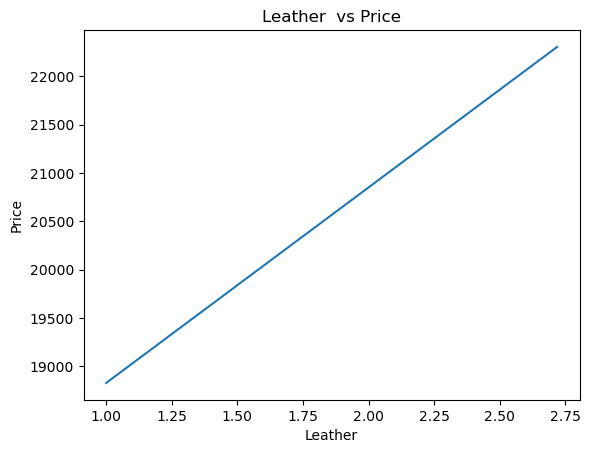

In [34]:
df['Trans_1'] = np.exp(df['Leather'])

df.groupby('Trans_1')['Price'].mean().plot()

plt.title('Leather  vs Price')

plt.xlabel('Leather')

plt.ylabel('Price')

plt.show()

# 1). There is no linear releaton btw Doors and price, 2). There is poor cor-releation, 3). All transformations are tried

In [35]:
df[['Trans_1' , 'Price']].corr()

,Trans_1,Price
Trans_1,1.000000,0.157197
Price,0.157197,1.000000


# Spliting The Data 

In [36]:
X = df[['Cylinder', 'Liter', 'Cruise']].values  # Array of Features

y = df['Price'].values  # Target Variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler  # importing required package to train and split

scaler = StandardScaler()  # initialize the standardscaler

scaler.fit(X_train)  # we are finding the mean and sd from the TD

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)  # only fit the x_train not the X_test 

# Model Traning

In [38]:
from sklearn.linear_model import LinearRegression  # importing the required package for linear model

regressor = LinearRegression()  # initialize the linear model to variable

regressor.fit(X_train_scaled , y_train)

LinearRegression()

In [39]:
regressor.intercept_

21348.520925212506

In [40]:
coef_df = pd.DataFrame(regressor.coef_ , ['Cylinder', 'Liter', 'Cruise'], columns = ['Coefficient'])

coef_df

,Coefficient
Cylinder,4839.849421
Liter,167.410659
Cruise,2314.842413


In [41]:
y_pred = regressor.predict(X_test_scaled)

y_pred

array([17935.30264819, 17965.69859317, 17965.69859317, 25210.49497524,
       19675.25686281, 25210.49497524, 32333.7075774 , 12415.26250825,
       19675.25686281, 12476.0543982 , 12476.0543982 , 17980.89656565,
       19675.25686281, 17935.30264819, 17965.69859317, 17965.69859317,
       25164.90105777, 12384.86656327, 25164.90105777, 32333.7075774 ,
       12476.0543982 , 19675.25686281, 12476.0543982 , 25210.49497524,
       25210.49497524, 25180.09903026, 25210.49497524, 17935.30264819,
       17980.89656565, 32546.47919224, 25164.90105777, 17874.51075823,
       25180.09903026, 25104.10916782, 25180.09903026, 12476.0543982 ,
       17965.69859317, 32500.88527477, 17965.69859317, 25210.49497524,
       25210.49497524, 19675.25686281, 17965.69859317, 17980.89656565,
       25210.49497524, 17935.30264819, 17965.69859317, 25164.90105777,
       19675.25686281, 12476.0543982 , 17980.89656565, 12476.0543982 ,
       17935.30264819, 25058.51525035, 12476.0543982 , 25210.49497524,
      

In [42]:
df_ = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

df_

,Actual,Predicted
0,30353.585554,17935.302648
1,12878.046829,17965.698593
2,13494.288783,17965.698593
3,17586.928583,25210.494975
4,16027.286487,19675.256863
...,...,...
237,26789.832608,17935.302648
238,10921.945372,12384.866563
239,12487.054293,12476.054398
240,14398.922693,12415.262508


# Evaluation Metric

In [43]:
from sklearn import metrics  # importing the required metric to validate the model

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.36957340248926984


# Part 3

In [44]:
df_ = pd.read_csv("car_data.csv")  # reading the dataset

df_.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [45]:
dummy=pd.get_dummies(df_[["Make","Model","Type"]])

dummy.head()

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
df_dummies=pd.concat([df_['Price'], dummy], axis=1)

df_dummies.head()

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
for i in ['Make', 'Model', 'Trim', 'Type']:
    df_[i] = label_encoder.fit_transform(df_[i])
df_.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1


In [48]:
Car_Features = list(df_.columns)[1:]

X = df_.iloc[:,1:]

Y = df_.Price

In [52]:
from sklearn.linear_model import LinearRegression

Car_Features = list(df_.columns)[1:]
Car_Price = ["Price"]
X = df_.iloc[:,1:]
Y = df_.Price
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

combos = []
   
for i in range(1, 7):
    combos.append(combinations(Car_Features, i))



check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df_[groupx]
        
        model = LinearRegression(fit_intercept=False)
            
        model = model.fit(x,Y)
        model_score = model.score(x, Y)
        if check_score < model.score(x, Y):
            check_score = model.score(x, Y)
            maxgroup = groupx
            
print(maxgroup, 'model_score =', check_score)

['Mileage', 'Make', 'Model', 'Trim', 'Cylinder', 'Cruise'] model_score = 0.4786472731305005
